In [18]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from numpy import ndarray
import json

def graphGame(time_remaining: pd.Series, probabilities: ndarray, home: tuple[str, str], away: tuple[str, str]):
    plt.figure(figsize=(10, 6))
    plt.plot(time_remaining, probabilities, color='black', linewidth=1)

    plt.fill_between(time_remaining, probabilities, 0, color=home[1], alpha=0.4, label=home[0])
    plt.fill_between(time_remaining, probabilities, 1, color=away[1], alpha=0.4, label=away[0])

    plt.xlim(0, 3600)
    plt.ylim(0, 1.0)
    plt.grid(False)
    plt.gca().invert_xaxis()
    plt.title("Home Team Win Probability Over Time")
    plt.xlabel("Time Remaining (s)")
    plt.ylabel("Win Probability")
    plt.legend()
    plt.grid()
    plt.show()


In [19]:
# Load the sklearn model using pickle
with open("../scripts/meter.pkl", "rb") as f:
    model: LogisticRegression
    model = pickle.load(f)

# Load the dataframes
df = pd.read_parquet("../data/time_slices.parquet")
games = pd.read_parquet("../data/games.parquet")

# load teams and colors
with open("teams.json") as f:
    teams = json.load(f)

In [20]:
game = 30227
season = 2009
filtered_df = df[(df["game"] == game) & (df["season"] == season)]

X = filtered_df.drop(columns=["winner", "game", "season"])

probabilities = model.predict_proba(X)

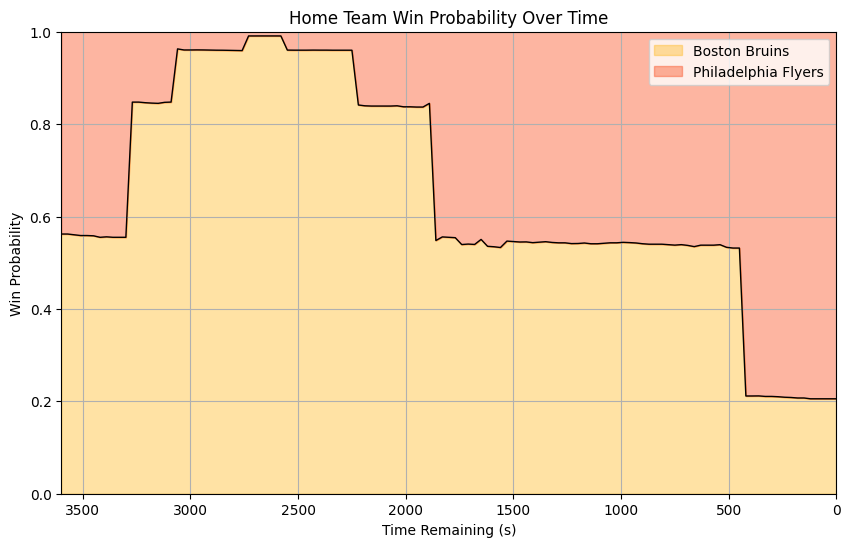

In [21]:
# find team colors and full names
filtered_game = games[(games["Game_Id"] == str(game)) & (games["Season"] == season)]
for t in teams:
    idx = next(i for i, color in enumerate(t["colors"]["hex"]) if color != '010101')
    color = t["colors"]["hex"][idx]

    if t["team_code"] == filtered_game.iloc[0]["Home_Team"]:
        home = (t["name"], f'#{color}')
    elif t["team_code"] == filtered_game.iloc[0]["Away_Team"]:
        away = (t["name"], f'#{color}')

graphGame(filtered_df["time_remaining"] * 3600, probabilities[:, 1], home, away)